Saving new.jpg to new.jpg


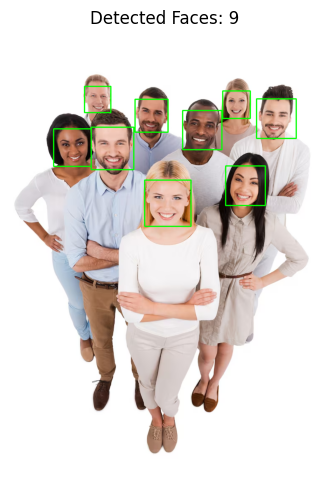

In [11]:
from google.colab import files
import cv2
import matplotlib.pyplot as plt

# Upload file
uploaded = files.upload()

# Get uploaded filename
filename = list(uploaded.keys())[0]

# Load the image
image = cv2.imread(filename)
if image is None:
    raise ValueError("Image could not be loaded. Check file format and name.")

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Load Haar cascade
cascade_path = cv2.data.haarcascades + "haarcascade_frontalface_default.xml"
face_cascade = cv2.CascadeClassifier(cascade_path)

if face_cascade.empty():
    raise RuntimeError("Failed to load Haar cascade.")

# Detect faces
faces = face_cascade.detectMultiScale(
    gray,
    scaleFactor=1.1,
    minNeighbors=5,
    minSize=(30, 30)
)

# Draw rectangles
for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Convert BGR to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display
plt.figure(figsize=(8, 6))
plt.imshow(image_rgb)
plt.axis("off")
plt.title(f"Detected Faces: {len(faces)}")
plt.show()
